In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [80]:
def load_data():
    return pd.read_csv("TF_2023-FII.csv")

def remove_rows_with_nan(df):
    return df.dropna(how='any')

def countNaNValues(df):
    return df.isnull().sum()

def countDistinct(df, column):
    return df[column].nunique()

def count_distinct_elements(df, column_name):
    return df[column_name].value_counts()

def remove_column(df, column):
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

def remove_dots(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('.', '')

def clean_and_convert_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace('.', '', regex=False)
    df[column_name] = df[column_name].str.replace(',', '.', regex=False).astype(float)

def convert_column_percentage_to_float(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '.').str.rstrip(' %').astype(float)

def convert_column_int_to_float(df, column_name):
    df.dropna(subset=[column_name], inplace=True)
    df[column_name] = df[column_name].apply(lambda x: int(x*1000) if x % 1 != 0 else int(x))

def preprocessing(df):
    remove_column(df, 'TAX. ADMINISTRAÇÃO')
    remove_column(df, 'TAX. PERFORMANCE')
    remove_column(df, 'TAX. GESTÃO')

    clean_and_convert_to_float(df, 'PREÇO ATUAL (R$)')
    clean_and_convert_to_float(df, 'LIQUIDEZ DIÁRIA (R$)')
    clean_and_convert_to_float(df, 'P/VP')
    clean_and_convert_to_float(df, 'PATRIMÔNIO LÍQUIDO')
    clean_and_convert_to_float(df, 'VOLATILIDADE')
    clean_and_convert_to_float(df, 'VPA')
    clean_and_convert_to_float(df, 'P/VPA')

    remove_dots(df, 'NUM. COTISTAS')

    convert_column_percentage_to_float(df, 'DIVIDEND YIELD')
    convert_column_percentage_to_float(df, 'DY (12M) ACUMULADO')
    convert_column_percentage_to_float(df, 'DY (3M) MÉDIA')
    convert_column_percentage_to_float(df, 'DY (12M) MÉDIA')
    convert_column_percentage_to_float(df, 'VARIAÇÃO PREÇO')
    convert_column_percentage_to_float(df, 'DY PATRIMONIAL')
    convert_column_percentage_to_float(df, 'VARIAÇÃO PATRIMONIAL')
    
def print_distinct_values(dataframe, column_name):
    distinct_values = dataframe[column_name].unique()
    print(f"Distinct values in column '{column_name}':")
    for value in distinct_values:
        print(value)
    
def plot_dataframes_with_color(dataframes, y_column1, y_column2):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple']  # Assigning colors for each DataFrame
    for idx, (df, color) in enumerate(zip(dataframes, colors)):
        plt.scatter(df[y_column1], df[y_column2], label=df['TIPO'].iloc[0], color=color)  # Scatter plot with 'TIPO' as circle color
    plt.xlabel(y_column1)
    plt.ylabel(y_column2)
    plt.title(f'{y_column1} vs {y_column2} with TIPO as color')
    plt.legend()
    plt.show()

C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column_name] = df[column_name].astype(str).str.replace('.', '')


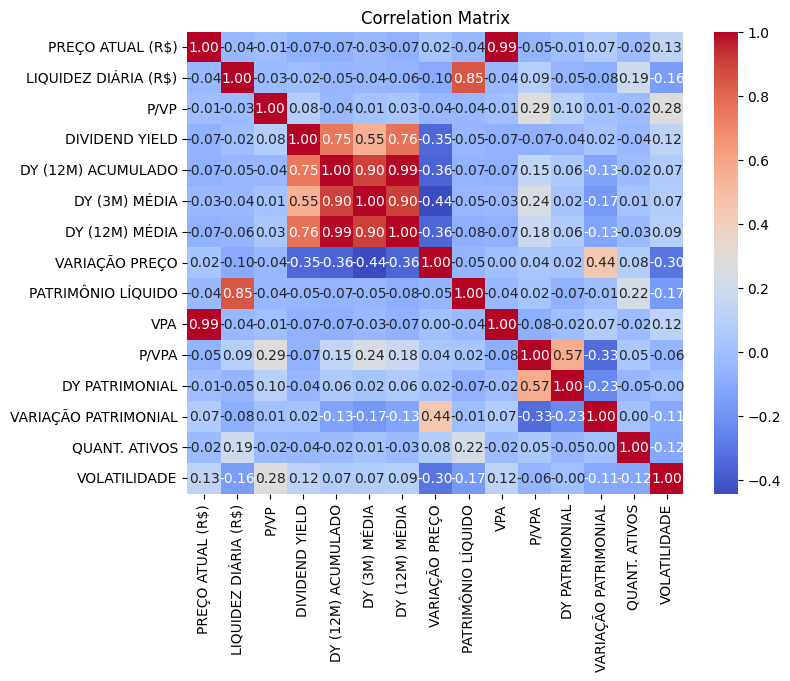

In [81]:
df = load_data()

preprocessing(df)

df_formatted = remove_rows_with_nan(df)

correlation_matrix = df_formatted.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Pela análise da matriz acima, encontramos as seguintes correlações relevantes:

DIVIDEND YIELD      (0.75 | 0.55 | 0.76) = 68.66
DY (12M) ACUMULADO  (0.75 | 0.90 | 0.99) = 88
DY (3M) MEDIA       (0.55 | 0.90 | 0.90) = 78.33
DY (12M) MEDIA      (0.76 | 0.99 | 0.90) = 88.33

Dessas, será mantido apenas o DY (12M) MEDIA, por ter uma maior média de correlação com os demais, e pelo fato desse dado demostrar um panorama geral do dado (média dos 12 meses)

PREÇO ATUAL E VPA

Apresentam uma forte correlação apenas entre si. Além disso, a correlação com todas as outras colunas é baixa e praticamente iguais entre si.

LIQUIDEZ DIÁRIA E PATRIMÔNIO LÍQUIDO

Removida a coluna PATRIMÔNIO LÍQUIDO pelo mesmo caso que o PREÇO ATUAL E VPA

P/VPA E DY PATRIMONIAL

Existe uma relação considerável entre essas 2 variáveis. Ainda, o P/VPA tem uma considerável associação negativa com a VARIAÇÃO PATRIMONIAL, logo, o removeremos

VARIAÇÃO PATRIMONIAL E VARIAÇÃO DO PREÇO

Colunas com uma certa correlação

Removeremos a VARIAÇÃO DO PREÇO por ela também ter uma certa relação negativa com a VOLATILIDADE(-0.3) e com o DY (12M) MEDIA(-0.36)

C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, 

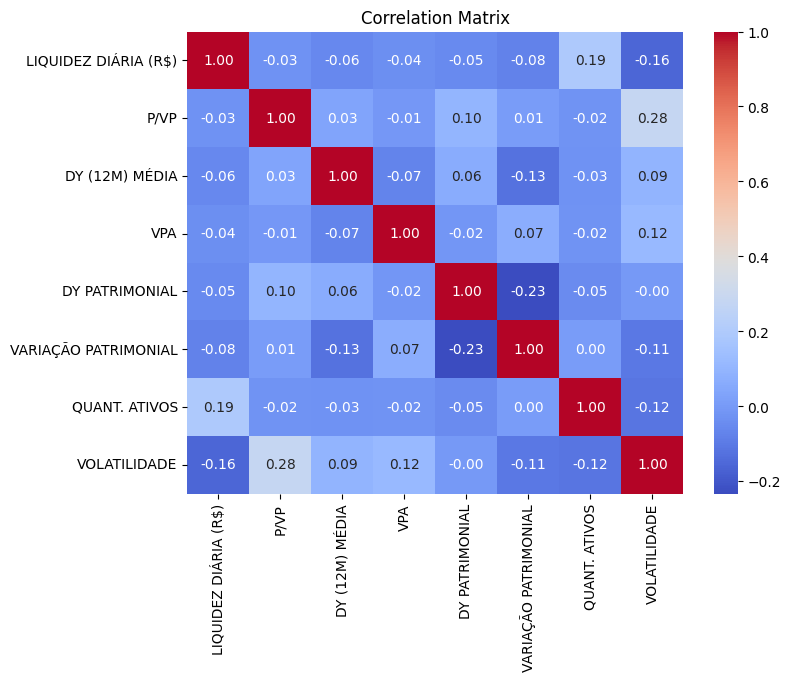

In [82]:
remove_column(df_formatted, 'DIVIDEND YIELD')
remove_column(df_formatted, 'DY (12M) ACUMULADO')
remove_column(df_formatted, 'DY (3M) MÉDIA')

remove_column(df_formatted, 'PREÇO ATUAL (R$)')

remove_column(df_formatted, 'PATRIMÔNIO LÍQUIDO')

remove_column(df_formatted, 'P/VPA')

remove_column(df_formatted, 'VARIAÇÃO PREÇO')

correlation_matrix = df_formatted.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [83]:
remove_column(df, 'DIVIDEND YIELD')
remove_column(df, 'DY (12M) ACUMULADO')
remove_column(df, 'DY (3M) MÉDIA')
remove_column(df, 'PREÇO ATUAL (R$)')
remove_column(df, 'PATRIMÔNIO LÍQUIDO')
remove_column(df, 'P/VPA')
remove_column(df, 'VARIAÇÃO PREÇO')

df_test = df[df['TIPO'] == '?']
remove_column(df_test, 'FUNDOS')
remove_column(df_test, 'TIPO')

print("df test is:", df_test)

#dist = count_distinct_elements(df, 'TIPO')
#print("size is", len(df), "and dist is", dist)

df = remove_rows_with_nan(df)
df = df[df['TIPO'] != '?']
dist = count_distinct_elements(df, 'TIPO')

print("now size is", len(df), "and dist is", dist)

print("size is", len(df))

# Splitting data into features and target
X = df[['LIQUIDEZ DIÁRIA (R$)', 'P/VP', 'DY (12M) MÉDIA', 'VPA', 'DY PATRIMONIAL', 
        'VARIAÇÃO PATRIMONIAL', 'QUANT. ATIVOS', 'VOLATILIDADE', 'NUM. COTISTAS']]
y = df['TIPO']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Decision Tree Classifier
#clf = DecisionTreeClassifier(class_weight='balanced')
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

# Make predictions for new rows
predicted_tipo = clf.predict(df_test)

# Display predicted 'TIPO' values
print("Predicted 'TIPO' values:")
print(predicted_tipo)

df test is:      LIQUIDEZ DIÁRIA (R$)  P/VP  DY (12M) MÉDIA     VPA  DY PATRIMONIAL  \
425               1027.00  0.60            1.28     NaN             NaN   
426            4527574.42  1.01            1.27    9.64            1.24   
427             213783.30  1.09            0.39     NaN             NaN   
428           15546428.15  0.99            0.71  112.31            0.76   
429                   NaN  0.83            0.65  100.97            0.69   

     VARIAÇÃO PATRIMONIAL  QUANT. ATIVOS  VOLATILIDADE NUM. COTISTAS  
425                   NaN              0         67.71          3730  
426                  0.00              0         10.43        226183  
427                   NaN              1         85.27          2860  
428                 11.26              2         13.99        370163  
429                 -2.34              4         18.04          2200  
now size is 270 and dist is TIJOLO             161
PAPEL               63
SHOPPING            18
MISTO         

C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_1128\2935096988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)


In [84]:
fig, ax = plt.subplots(figsize=(150, 100))  # Adjust size as needed
tree.plot_tree(clf, 
               feature_names=X.columns,  # Your features here
               class_names=clf.classes_,  # Your classes here
               filled=True, 
               rounded=True, 
               ax=ax)
plt.show()